# Chapter 44: Advanced Graphing (Axes, Plots, and Graphs)

Let's review some simple graphes seen in chapter 22 at first.

In [1]:
from music21 import *

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score bwv66>>

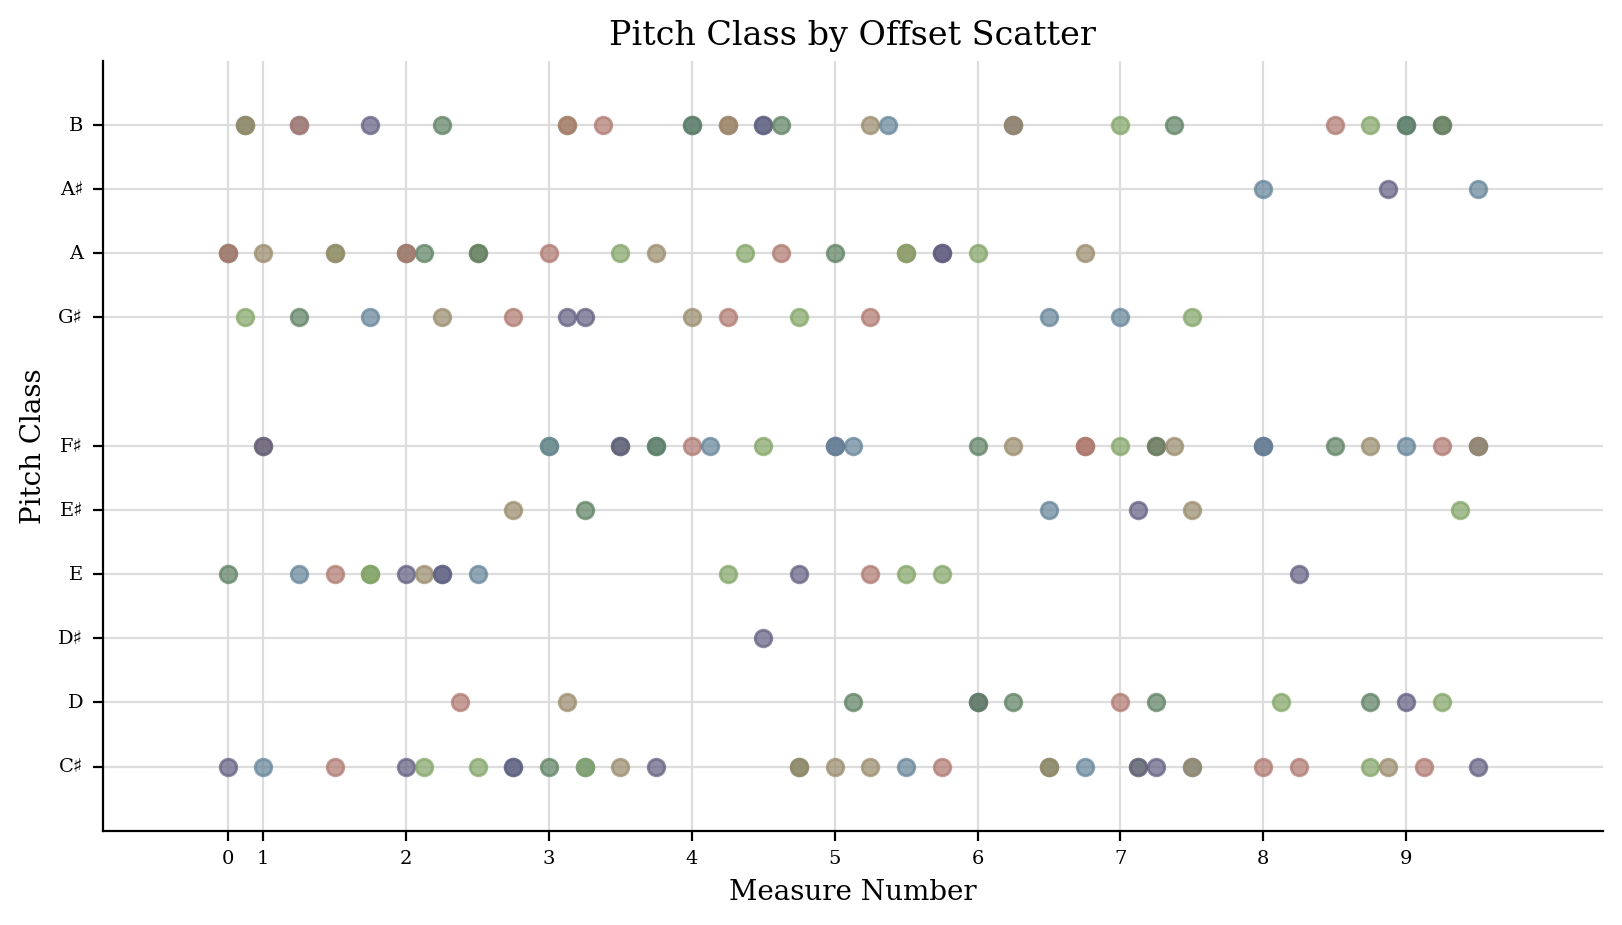

In [2]:
bach = corpus.parse('bwv66.6')
bach.id = 'bwv66'
bach.plot('scatter', 'offset', 'pitchClass')

When we call *s.plot()* we are actually just calling a function called ***plotStream()***.

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score bwv66>>

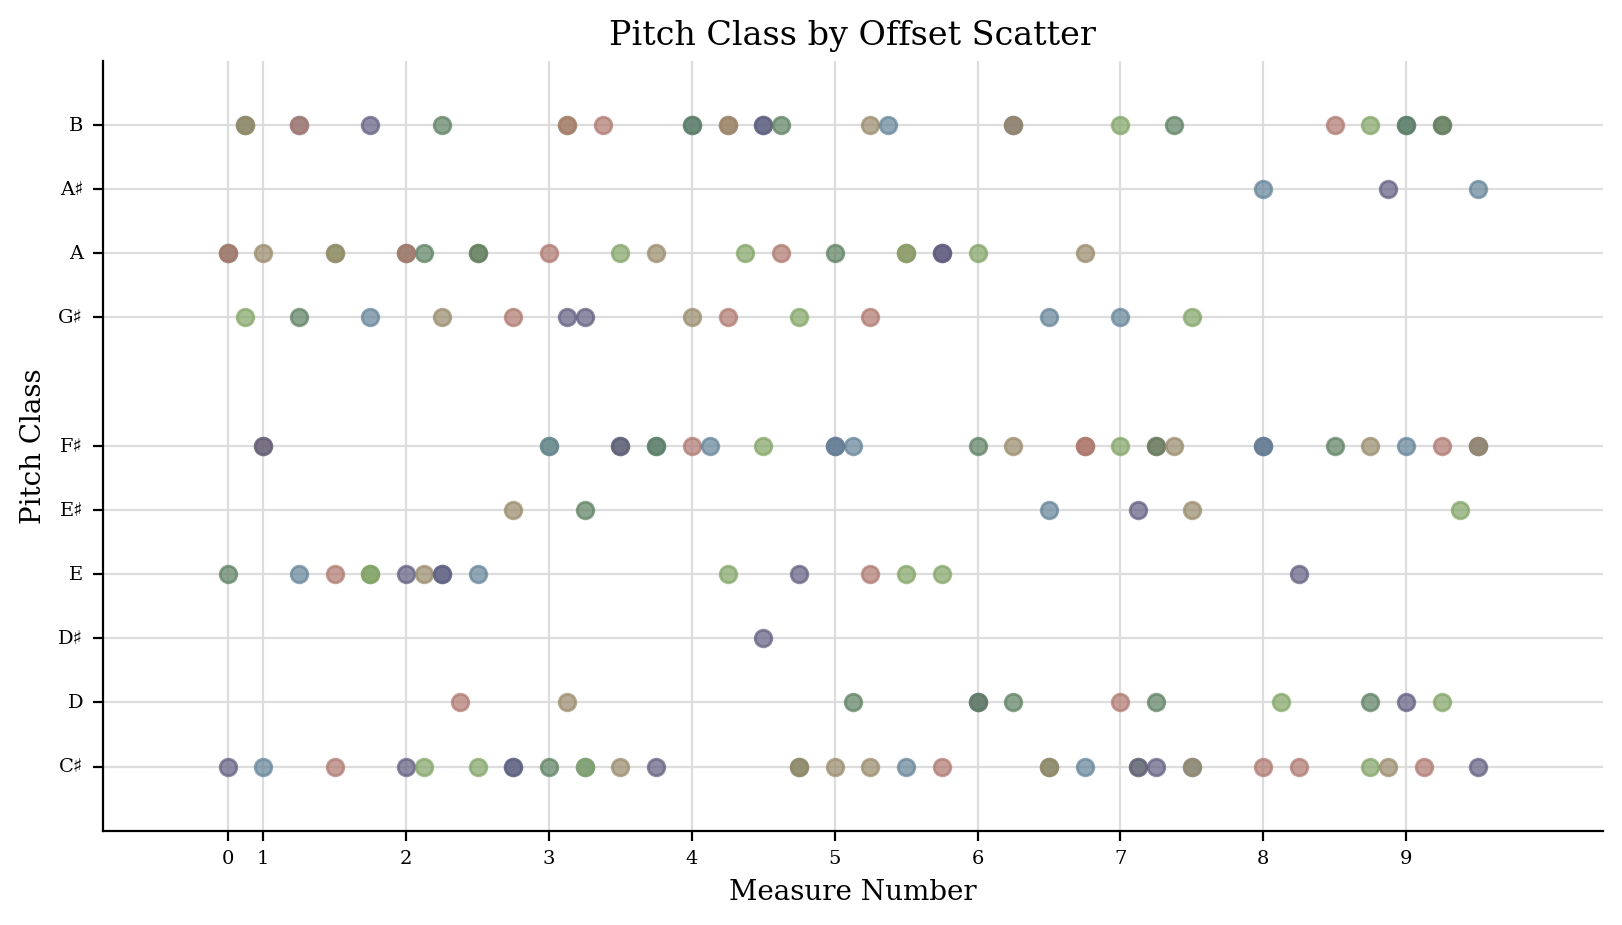

In [3]:
graph.plotStream(bach, 'scatter', 'offset', 'pitchClass')

*plotStream* uses a helper function called ***music21.graph.findPlot.getPlotsToMake()*** to get a list of classes that can successfully plot this relationship

In [4]:
graph.findPlot.getPlotsToMake('scatter', 'offset', 'pitchClass')

[music21.graph.plot.ScatterPitchClassOffset]

A Plot is a class that can take in a stream and when ***.run()*** is called, will extract all the data from the stream and show it:

In [5]:
scatter = graph.plot.ScatterPitchClassOffset(bach)
scatter

<music21.graph.plot.ScatterPitchClassOffset for <music21.stream.Score bwv66>>

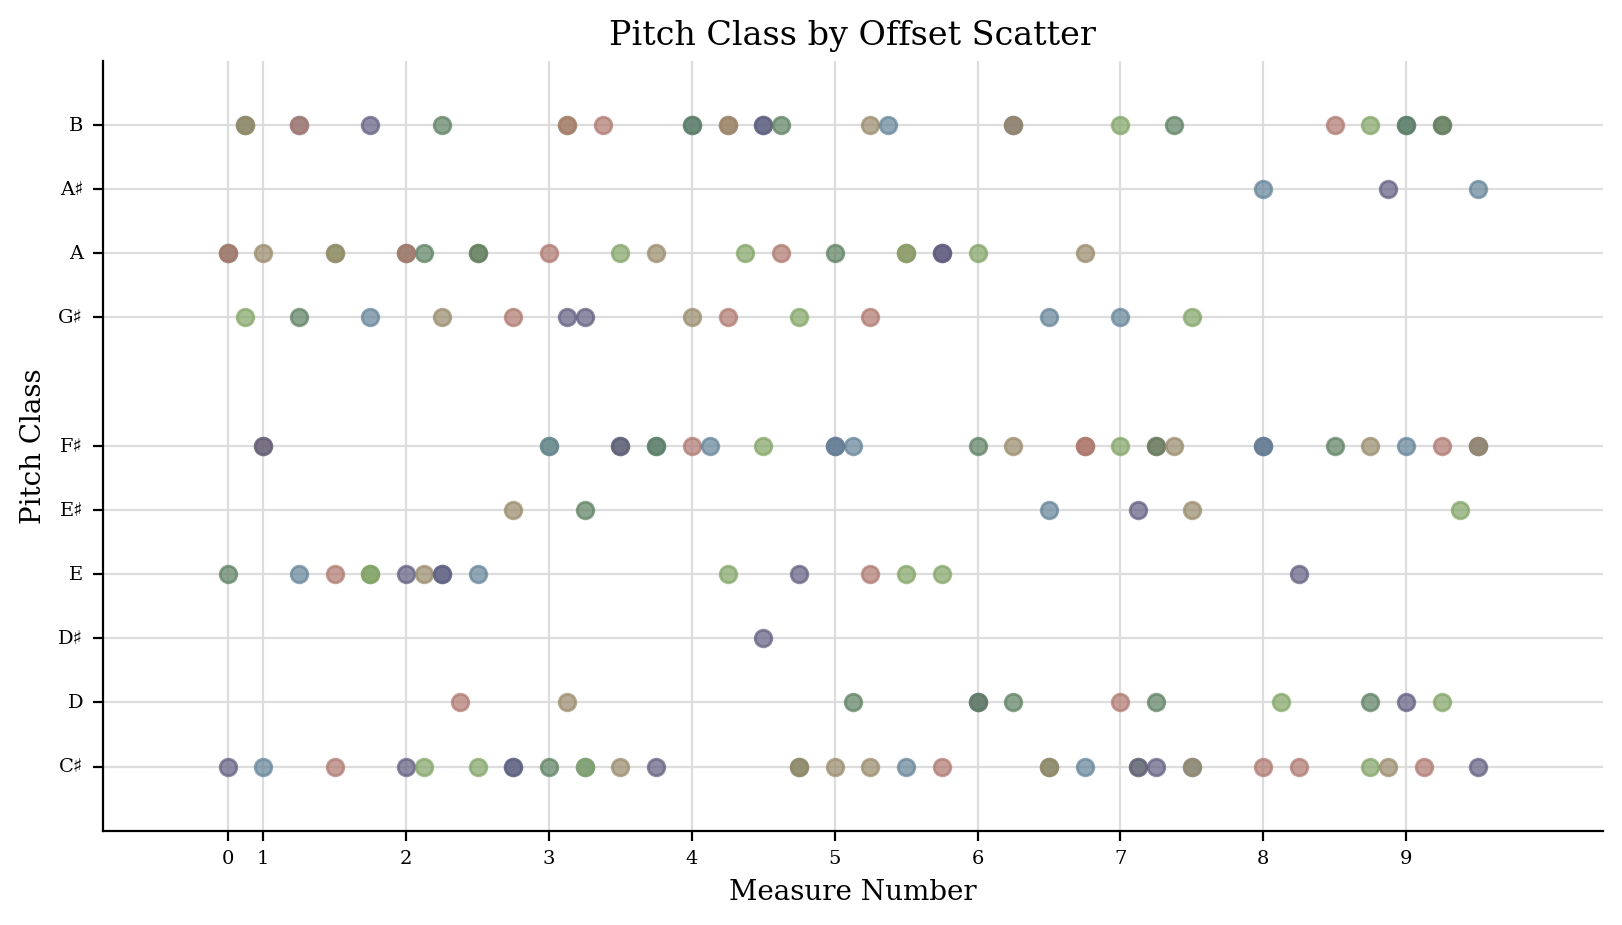

In [6]:
scatter.run()

We can change the figure size:

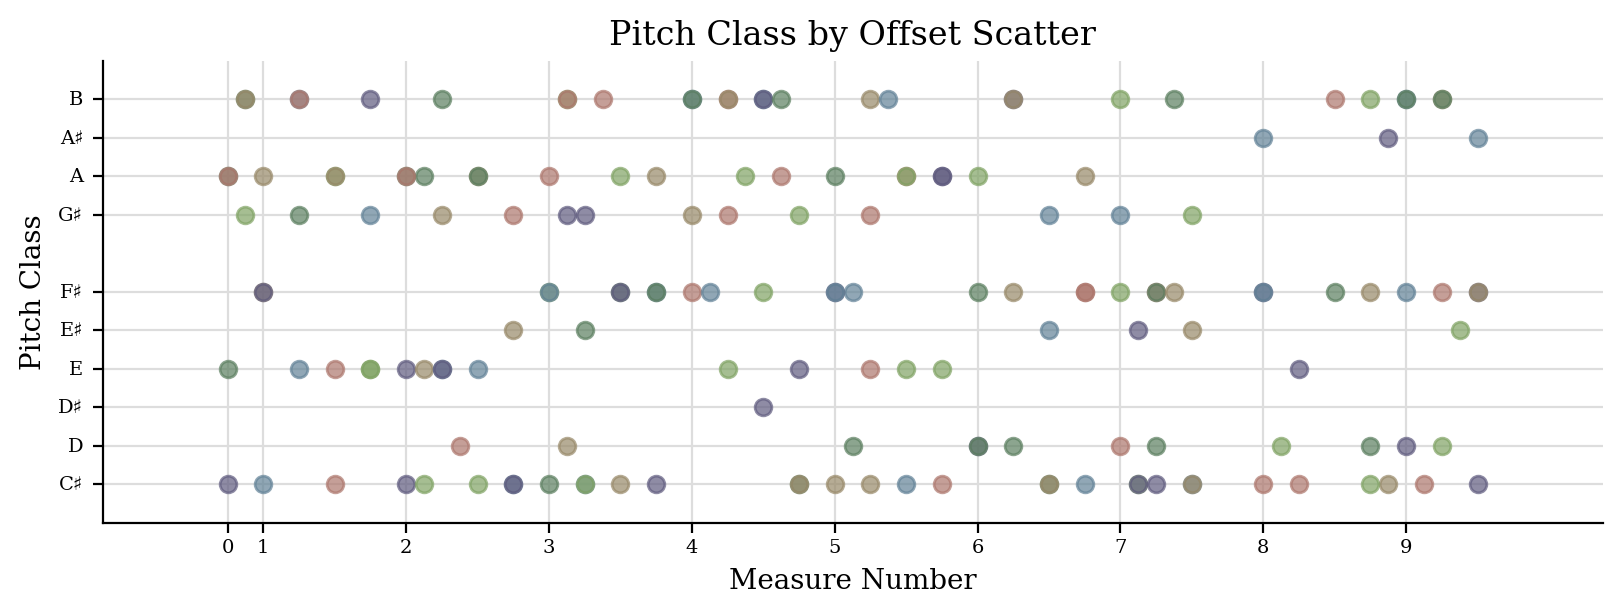

In [7]:
scatter.figureSize = (10, 3)
scatter.run()

We can **change any of the following**:

*    alpha (which describes how transparent elements of the graph are)
*    colorBackgroundData
*    colorBackgroundFigure
*    colorGrid
*    colors (a list of colors to cycle through)
*    tickFontSize
*    titleFontSize
*    labelFontSize
*    fontFamily
*    marker
*    markersize

and a bunch more. See ***.keywordConfigurables***

In [8]:
scatter.keywordConfigurables

('alpha',
 'colorBackgroundData',
 'colorBackgroundFigure',
 'colorGrid',
 'colors',
 'doneAction',
 'dpi',
 'figureSize',
 'fontFamily',
 'hideXGrid',
 'hideYGrid',
 'labelFontSize',
 'marker',
 'markersize',
 'tickColors',
 'tickFontSize',
 'title',
 'titleFontSize',
 'xTickLabelHorizontalAlignment',
 'xTickLabelRotation',
 'xTickLabelVerticalAlignment')

For example:

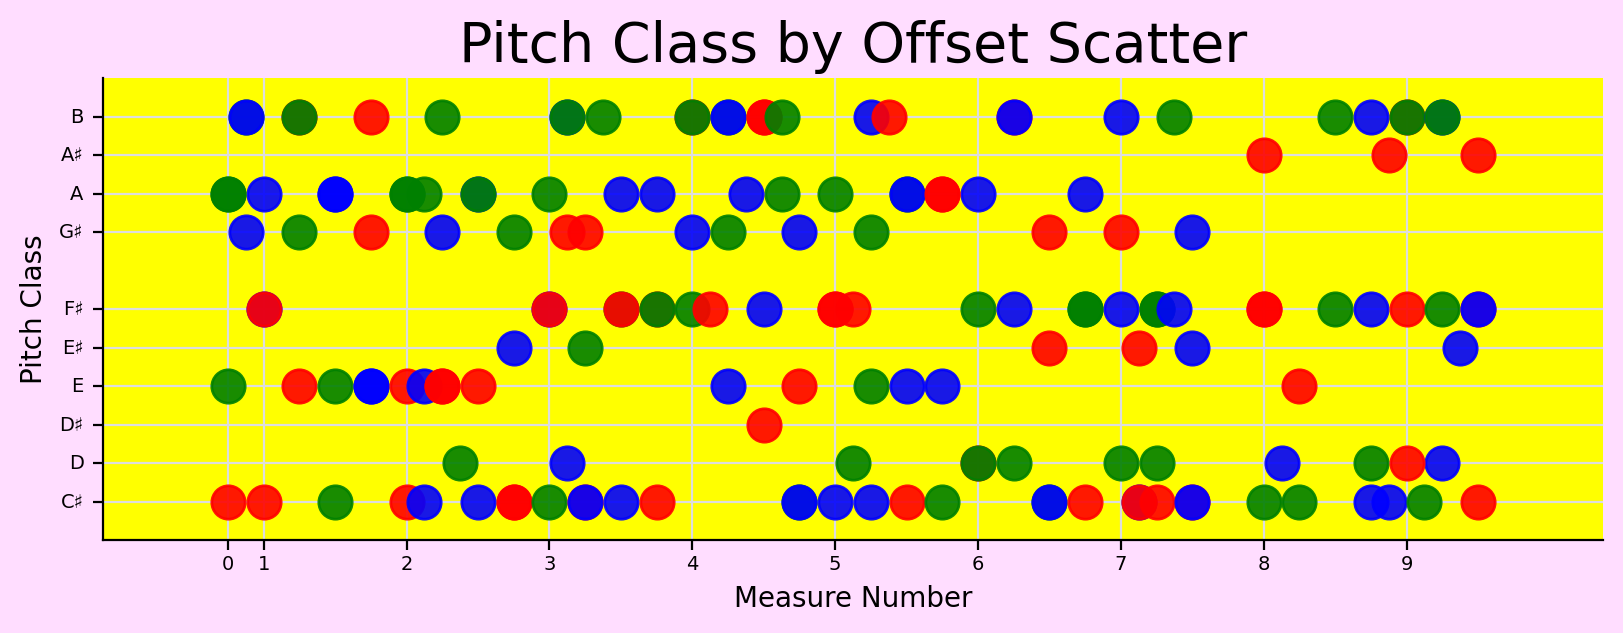

In [9]:
scatter.fontFamily = 'sans-serif'
scatter.markersize = 12
scatter.colors = ['red', 'green', 'blue'] # will cycle among these
scatter.alpha = 0.9
scatter.colorBackgroundFigure = '#ffddff' # a light purple
scatter.colorBackgroundData = 'yellow'
scatter.titleFontSize = 20
scatter.run()

That’s too garish for me. Let’s go back to our original graph:

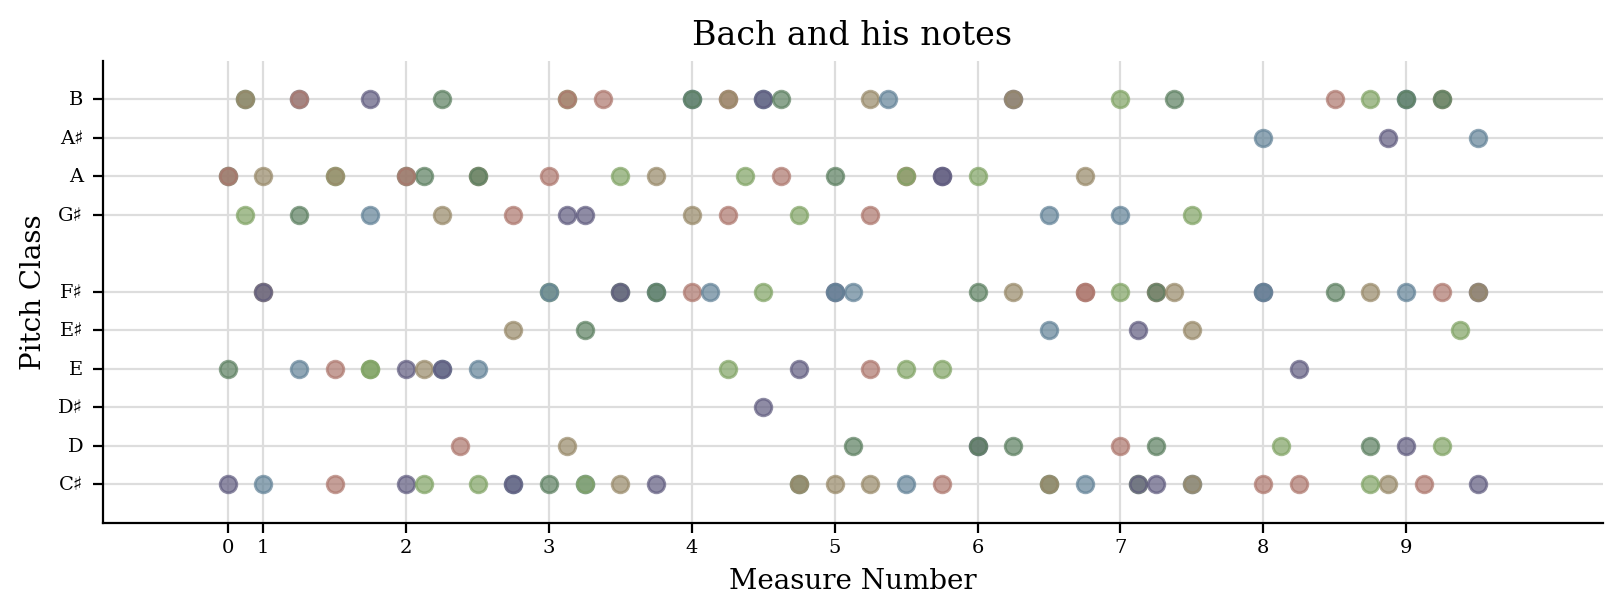

In [10]:
scatter = graph.plot.ScatterPitchClassOffset(bach)
scatter.title = 'Bach and his notes'
scatter.figureSize = (10, 3)
scatter.run()

We can look at the individual data points:

In [11]:
data = scatter.data
len(data)

165

In [12]:
data[0]

(0.0, 1, {})

Here we see that at X = 0.0, there is a Y value of 1.Since **pitchClass 1 is C#**, this makes perfect sense.

Let’s move it to D# (pitch class 3). Since it is a **tuple**(元组), this won’t work

In [13]:
data[0][1] = 3

TypeError: 'tuple' object does not support item assignment

Tuples are **immutable** (unchangeable) objects. But we can make a new tuple and put it back into data:

In [14]:
data[0] = (0.0, 3, {})

we can call ***.process()*** which just regenerates the graph

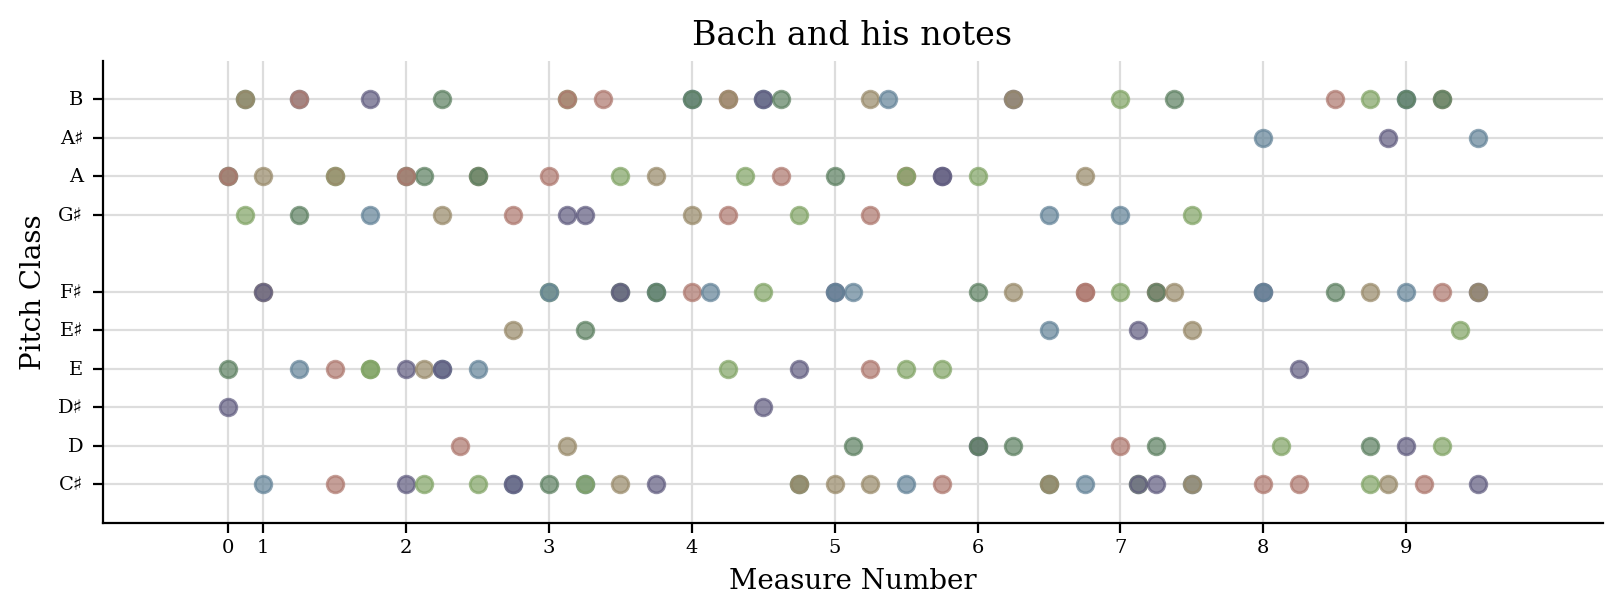

In [16]:
# If we call .run() again, however, the stream will be extracted again and this data point will be lost.
scatter.process()

Do you see that the first point has moved from C# to D#? Very nice.

In case it’s not clear, we can add an annotation to the plot. After generating the plot once, it is stored in a variable called ***.subplot***:

In [17]:
scatter.subplot

<Axes: title={'center': 'Bach and his notes'}, xlabel='Measure Number', ylabel='Pitch Class'>

On that subplot we can use any of the Artist tools found in the **matplotlib** toolkit

In [21]:
# add a circle around that dot to make it clearer
from matplotlib import pyplot as plt
center = (0.0, 3) # right on the dot
radius = 1.0
circleDsharp = plt.Circle(center, radius, color='red', alpha=0.5)
scatter.subplot.add_artist(circleDsharp)

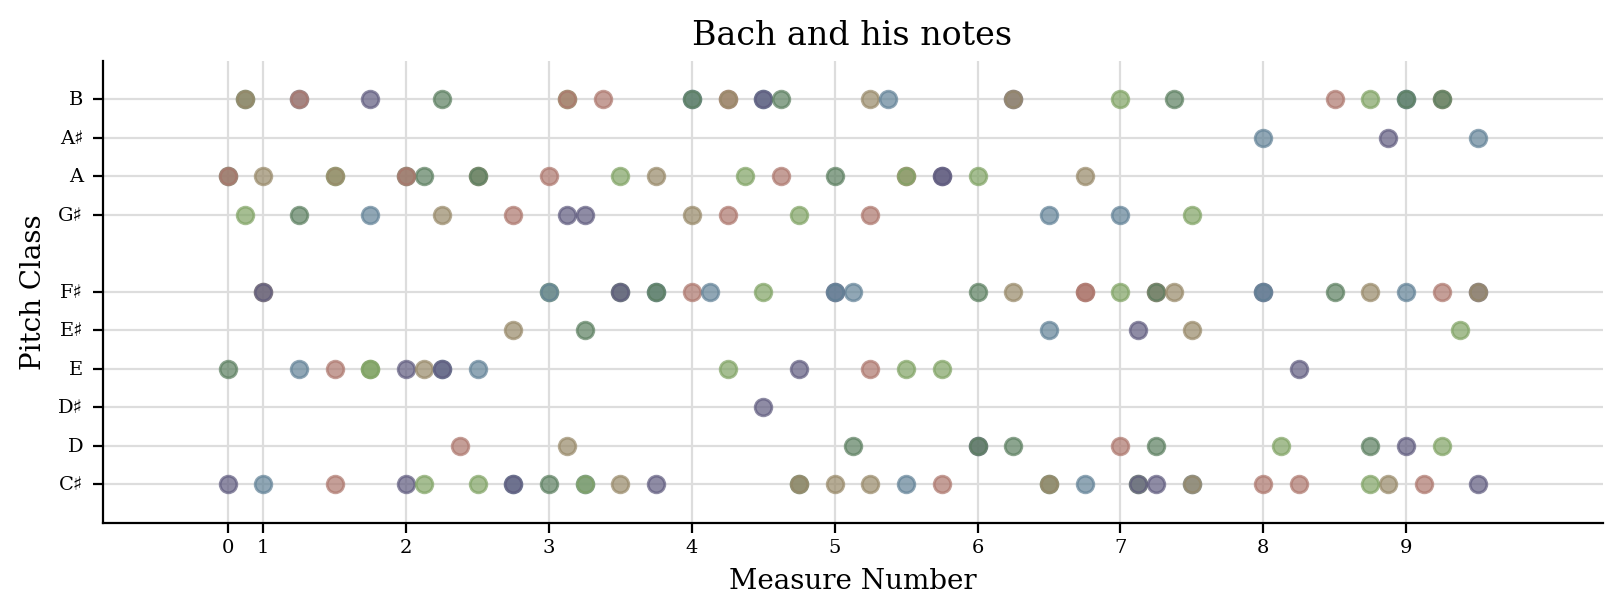

In [19]:
# scatter.run()

Of course we can’t call *.run()* any more since that recreates the data from the stream.(But we also can’t call *.process*, since that recreates the subplot).

Instead to reuse the existing *.subplot* we should call ***.write()***

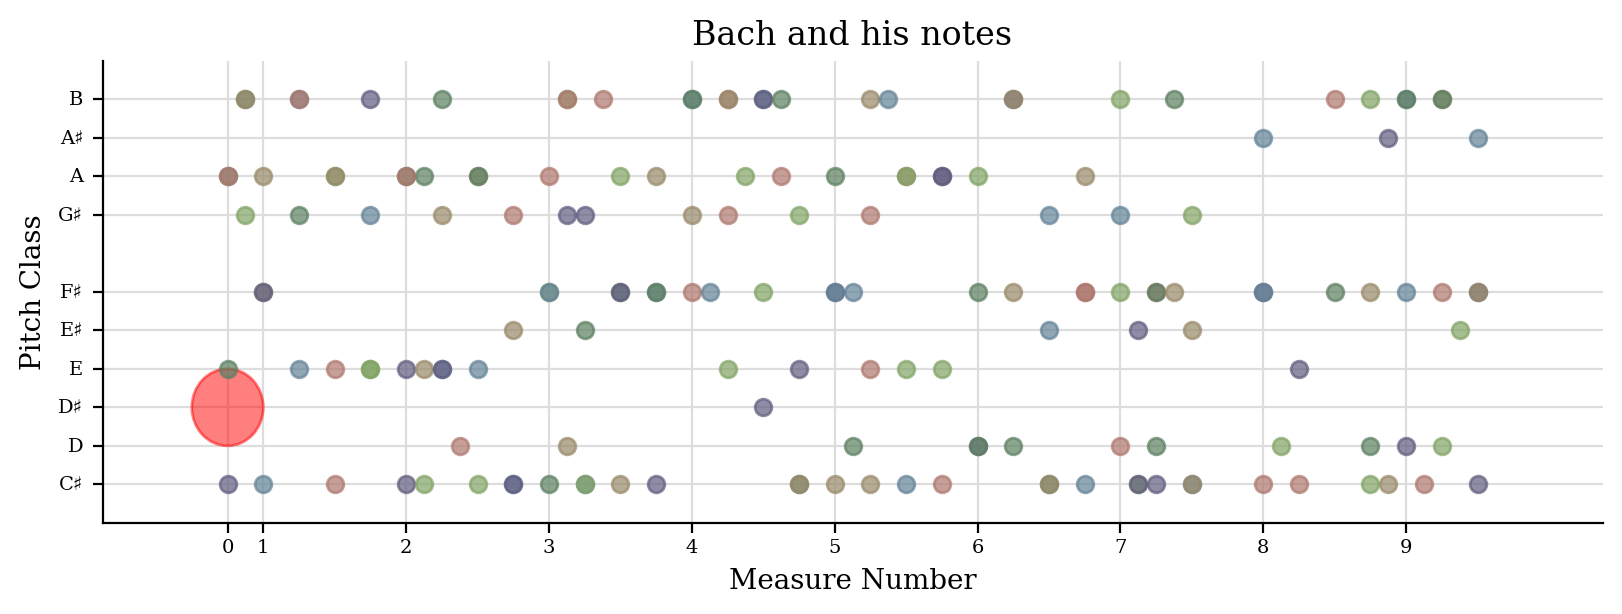

In [22]:
scatter.write()

So to review:

***.run()*** the first time, to process the stream and get the data.

***.process()*** when the data has been changed and the figure needs to be regenerated from data.

***.write()*** when the figure has been created once, annotated, and needs to be seen again.

## Axis (and allies)

Every graph have **X** and **Y** axes.

Let’s look more closely at a simple set of axes, the ***PitchClassAxis*** and the ***QuarterLengthAxis***.

First we’ll create a Plot object that uses these axes, such as ***ScatterPitchClassQuarterLength***:

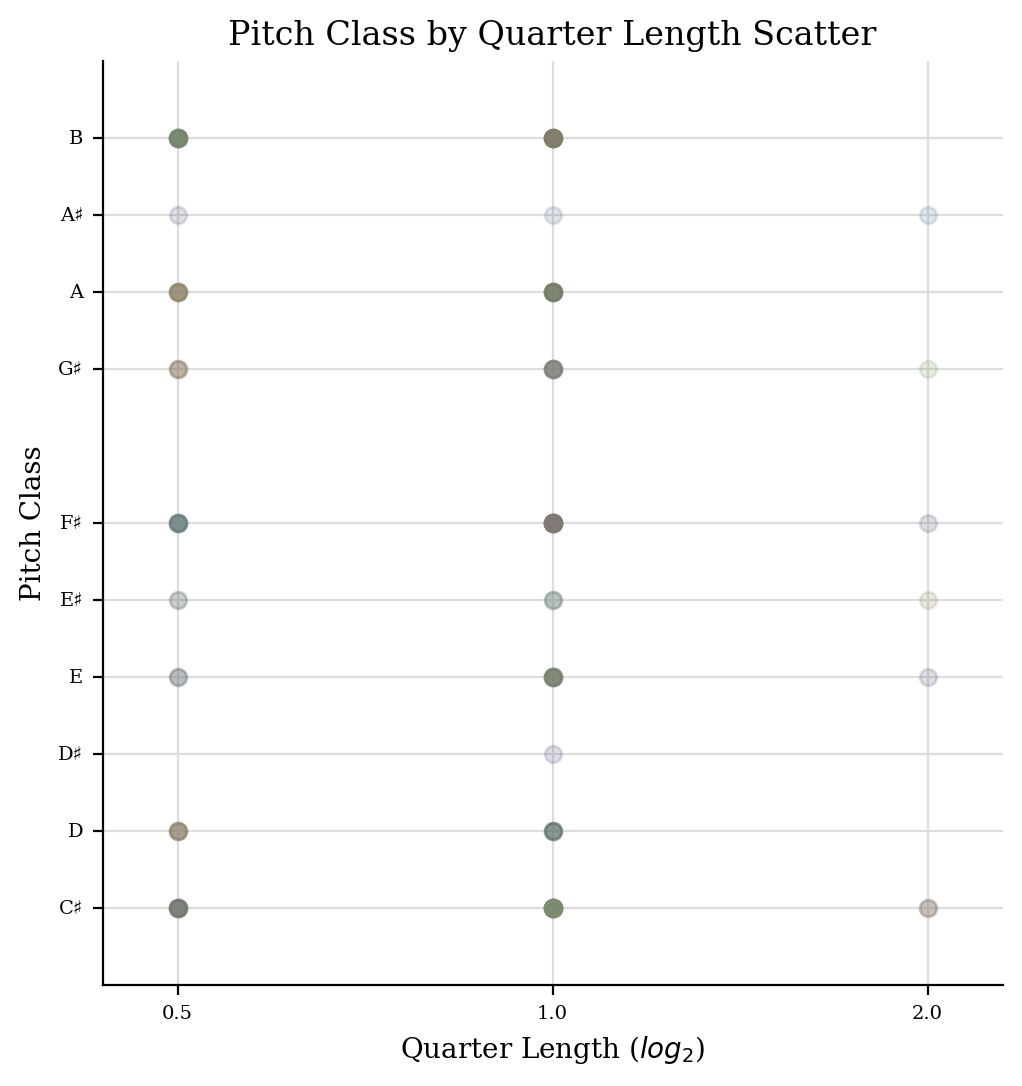

In [25]:
scatter3 = graph.plot.ScatterPitchClassQuarterLength(bach)
scatter3.run()

Now let’s look inside it for the axes:

In [26]:
scatter3.axisX

<music21.graph.axis.QuarterLengthAxis: x axis for ScatterPitchClassQuarterLength>

In [27]:
scatter3.axisY

<music21.graph.axis.PitchClassAxis: y axis for ScatterPitchClassQuarterLength>

Each axis defines its own label name:

In [28]:
(scatter3.axisX.label, scatter3.axisY.label)

('Quarter Length ($log_2$)', 'Pitch Class')

Axes also know their axis name, their *client* (the Plot object), and the stream they are operating on:

In [29]:
(scatter3.axisY.axisName, scatter3.axisY.client, scatter3.axisY.stream)

('y',
 <music21.graph.plot.ScatterPitchClassQuarterLength for <music21.stream.Score bwv66>>,
 <music21.stream.Score bwv66>)

There are three important things that any axis must do:

1.Take in each element and return values

2.Define the extent of the axis (minimum and maximum)

3.Show where “ticks”, that is, the axis value labels and grid lines will be.

for instance, if there were a ‘**Cardinality Axis**’ which reported the number of pitches at that moment, it would look something like this

In [30]:
class CardinalityAxis(graph.axis.Axis):
    labelDefault = 'Number of Pitches'

    def extractOneElement(self, el, formatDict):
        if hasattr(el, 'pitches'):
            return len(el.pitches)
        else:
            return 0

What is the "Cardinality Axis" ? (answer from chatGPT)

In music21, the Cardinality Axis is an abstract concept used to express **the quantity of various musical elements** in a piece of music. The Cardinality Axis is commonly used to represent the **number** of different elements in music analysis and computation, such as the number of notes, chords, measures, phrase sequences, etc.

The Cardinality Axis can be any sequence of integers within a **positive integer range**, such as 1, 2, 3, 4, 5, ... Each integer represents a particular element, such as a note, a measure, a chord, and represents the number of times that element occurs in a particular musical structure.

The length of the Cardinality Axis is **fixed** and determined by its **maximum value**. For example, in a measure sequence containing ten notes, the maximum value of the Cardinality Axis is 10, representing the maximum number of notes in that measure sequence. The length and maximum value of the Cardinality Axis can be **adjusted** as needed to fit different music analysis and computation tasks.

The concept of the Cardinality Axis is the **basis** of many music analysis and computation functions in music21. For example, the `stream.Stream.cardinalityAxis` method can be used to get the distribution of different types of elements (such as notes, chords, etc.) on the Cardinality Axis in a music stream.

In [31]:
# Testing is always important:
ca = CardinalityAxis()
ca.extractOneElement(chord.Chord('C E G'), None)

3

In [32]:
ca.extractOneElement(note.Note('D#'), None)

1

In [33]:
ca.extractOneElement(note.Rest(), None)

0

We can get the minimum and maximum value from the data, and give numeric ticks to the axis.

Let’s try this on a Schoenberg piece with a lot of chords.

In [34]:
schoenberg6 = corpus.parse('schoenberg/opus19', 6)
schoenberg6.measures(1, 4).show('xml')

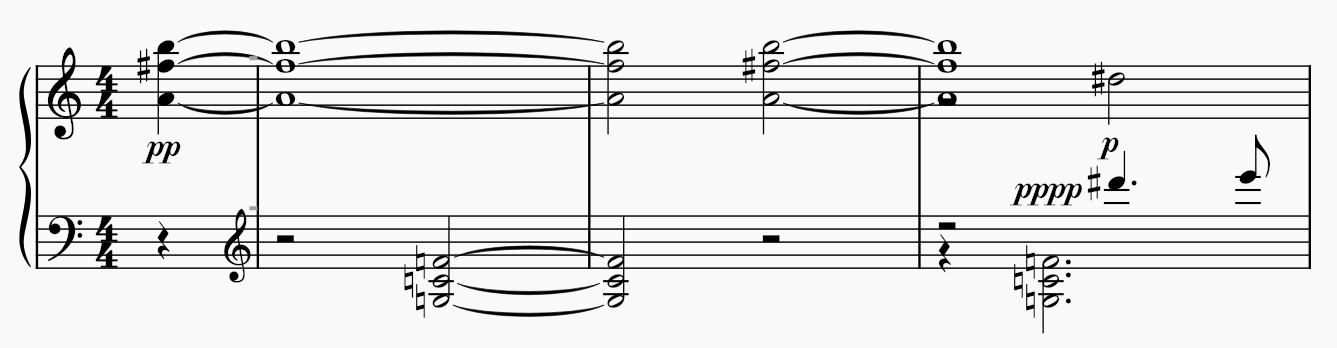

We’ll **chordify** the piece so that each chord has all the notes from each hand:

In [35]:
schChords = schoenberg6.chordify()
schChords.measures(1, 4).show('xml')

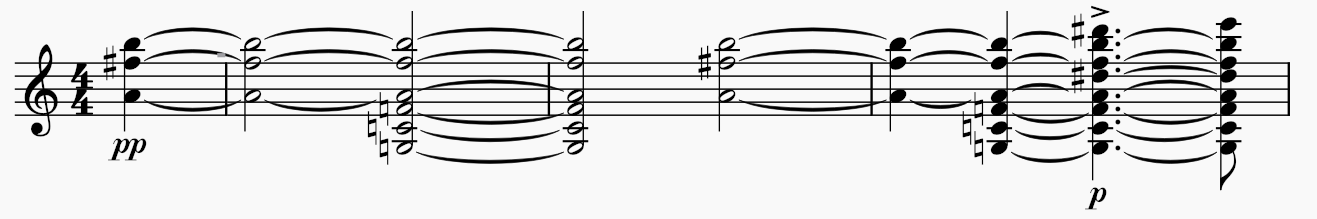

Now we’ll create a generic Scatter object to handle it:

In [36]:
plotS = graph.plot.Scatter(schChords)

And add a title and two axes, one being our new Cardinality axis:

In [37]:
plotS.title = 'Offset vs Cardinality'
plotS.axisX = graph.axis.OffsetAxis(plotS, 'x')
plotS.axisY = CardinalityAxis(plotS, 'y')

Notice that in instantiating(实例化) an axis, we pass in the plot name and the axis label. Both are important.

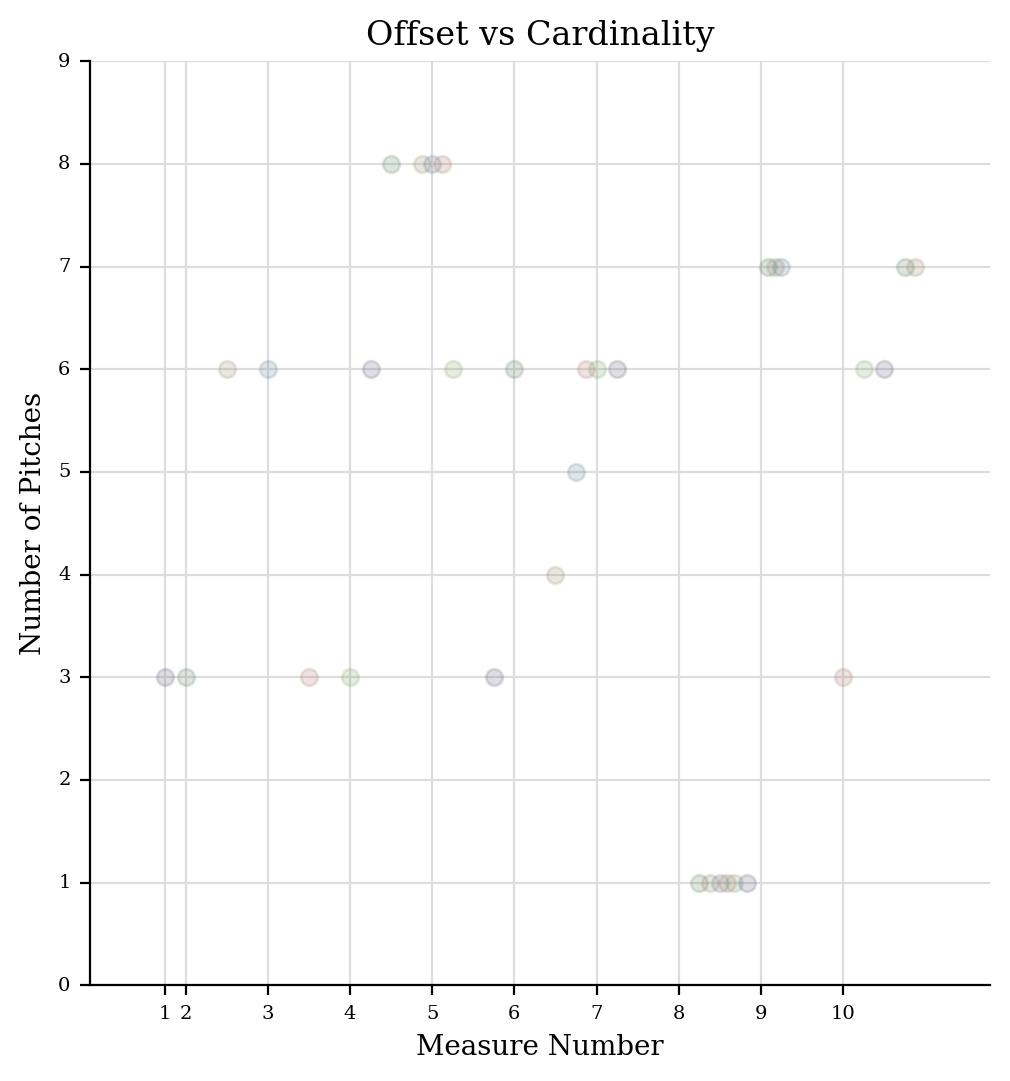

In [38]:
plotS.run()

Pretty cool, eh? Maybe we should customize the **tick values**:

In [39]:
def cardinalityTicks(self):
    names = ['rest', 'single', 'dyad', 'triad', 'tetrachord', 'pentachord', 'hexachord', 'septachord', 'octochord']
    ticks = []
    for i in range(int(self.minValue), int(self.maxValue) + 1):
        tickLocation = i
        cardinalityName = names[i]  # ideally, check that names[i] exists
        tickTuple = (tickLocation, cardinalityName)
        ticks.append(tickTuple)
    return ticks

CardinalityAxis.ticks = cardinalityTicks

We will set up our Scatter plot so that it gets rests also, **reset the axis minimum** to None (so it learns from the data) and we’ll be set to run.

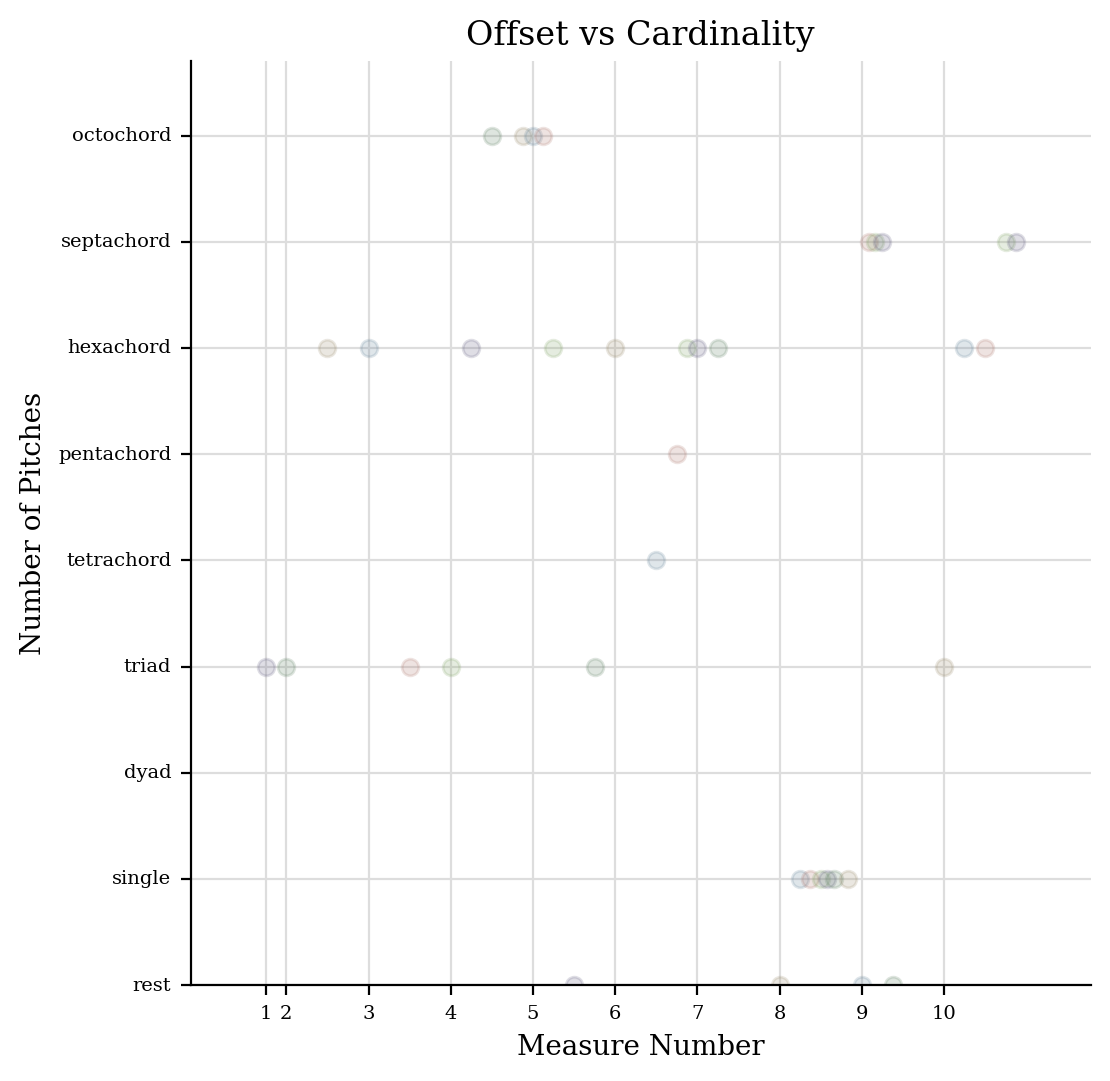

In [40]:
plotS.classFilterList.append('Rest')
plotS.axisY.minValue = None
plotS.run()

## Customizing Data Points

Instead of adding things like circles directly to the graph, it’s possible to **manipulate the display attributes of individual data points** directly.

To do this, we can manipulate the last element of each piece of data, some of the common ones are:


**‘alpha’** sets transparency, from 0 (transparent) to 1 (opaque).

**‘color’** gives a color to the data point – specified like “red” or “green” or an HTML color like “#ff0044”

**‘marker’** on a scatter plot will choose a shape for a marker as in this diagram

**‘markersize’** gives the size of the marker – notice that we’re using matplotlib names, so the “s” of size is lowercased (in music21 almost everything is camelCase)

Let’s make a new axis class which returns the **frequency of each pitch** but also **changes its marker** according to whether it’s in a certain key or not:

In [42]:
class FrequencyScaleAxis(graph.axis.Axis):
    labelDefault = 'Frequency'

    def __init__(self, client=None, axisName='y'):
        super().__init__(client, axisName)
        self.scale = scale.MajorScale('C')

    def ticks(self):
        '''
        Only get multiples of 400 as ticks
        '''
        ticks = super().ticks()
        newTicks = [tick for tick in ticks if tick[0] % 400 == 0]
        return newTicks

    def extractOneElement(self, el, formatDict):
        if not hasattr(el, 'pitch'):
            # perhaps a chord?
            # in which case the individual notes
            # will come here later
            return None

        scalePitches = self.scale.pitches
        pitchNames = [p.name for p in scalePitches]

        # modify formatDict in place

        if el.pitch.name in pitchNames:
            formatDict['marker'] = 'o'
            formatDict['color'] = 'red'
            formatDict['markersize'] = 10
        else:
            formatDict['marker'] = 'd'
            formatDict['color'] = 'black'
            formatDict['markersize'] = 8

        return int(el.pitch.frequency)

Check to see that it works:

In [43]:
fsa = FrequencyScaleAxis()
formatDict = {}
n = note.Note('A4')
fsa.extractOneElement(n, formatDict)

440

In [44]:
formatDict

{'marker': 'o', 'color': 'red', 'markersize': 10}

In [45]:
formatDict = {}
n = note.Note('B-4')
fsa.extractOneElement(n, formatDict)

466

In [46]:
formatDict

{'marker': 'd', 'color': 'black', 'markersize': 8}

Let’s make a stream with some data:

In [47]:
s = stream.Stream()
for ps in range(48, 96):
    n = note.Note()
    n.pitch.ps = ps
    s.append(n)

Okay, let's create a Scatter plot and make it happen:

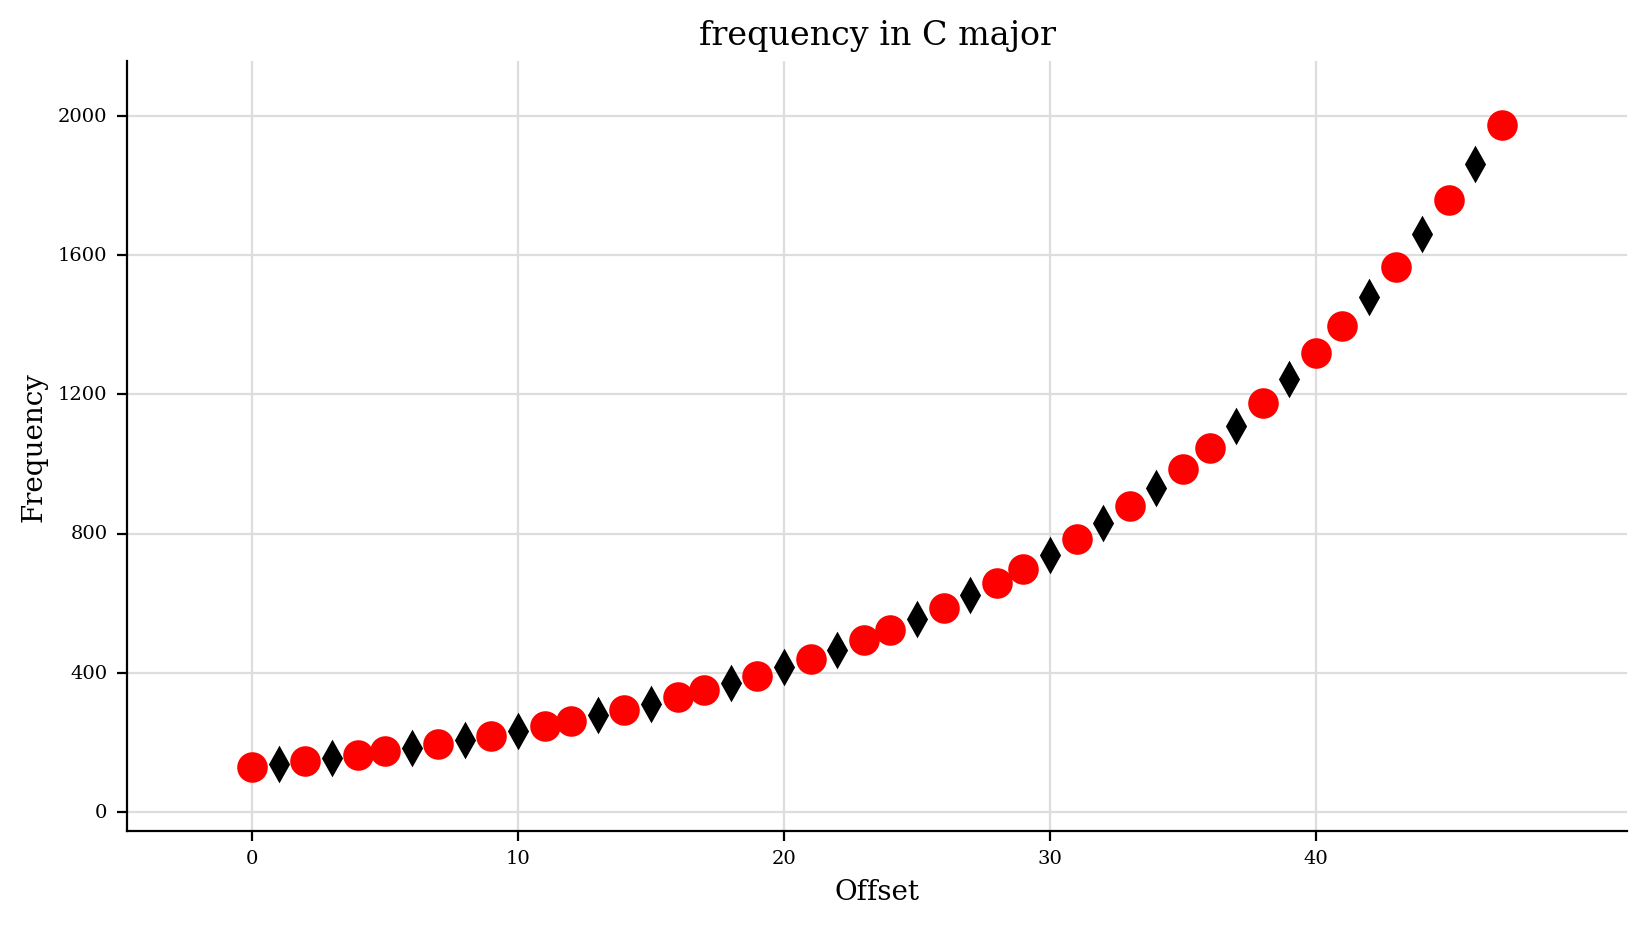

In [48]:
scatterFreq = graph.plot.Scatter(s, title='frequency in C major')
scatterFreq.figureSize = (10, 5)
scatterFreq.alpha = 1
scatterFreq.axisX = graph.axis.OffsetAxis(scatterFreq, 'x')
scatterFreq.axisY = FrequencyScaleAxis(scatterFreq, 'y')
scatterFreq.run()

## Graph Primitives

 if you want to get some of the advantages of the music21 Plot types without going all the way into matplotlib, there are **Graph primitives**.
 
 Here are some examples of how those work:

In [49]:
# Here is a way of plotting the life and death dates of composers
data = [('Chopin', [(1810, 1849-1810)]),
        ('Schumanns', [(1810, 1856-1810), (1819, 1896-1819)]),
        ('Brahms', [(1833, 1897-1833)])]

data

[('Chopin', [(1810, 39)]),
 ('Schumanns', [(1810, 46), (1819, 77)]),
 ('Brahms', [(1833, 64)])]

Because we are creating graphs on our own, we will need to define our own **tick values**.

In [50]:
xTicks = [(1810, '1810'),
          (1848, '1848'),
          (1897, '1897')]

Now we can create a GraphHorizontalBar and ***process*** (not run) it:

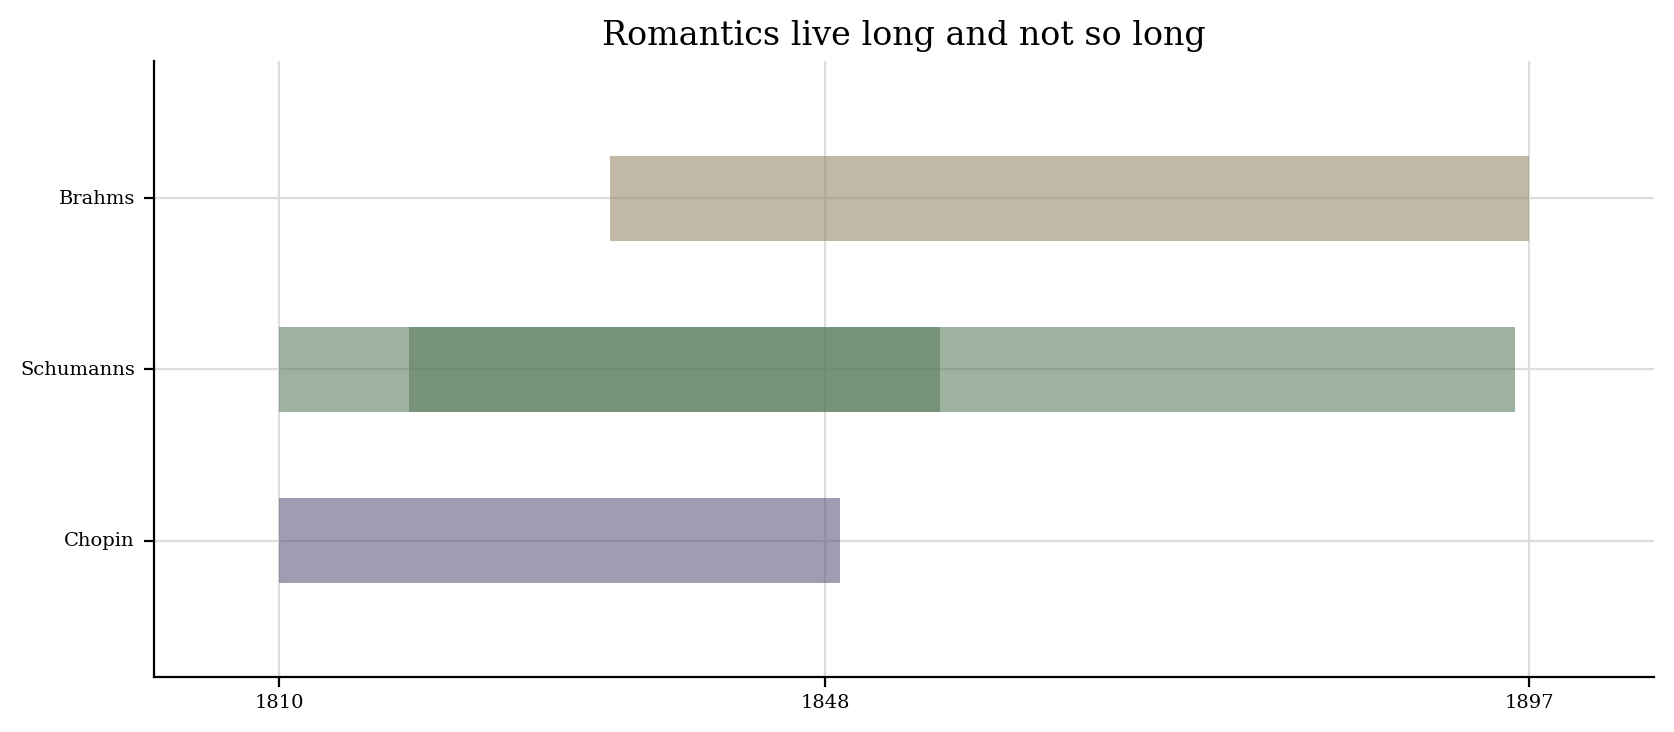

In [51]:
ghb = graph.primitives.GraphHorizontalBar()
ghb.title = 'Romantics live long and not so long'
ghb.data = data
ghb.setTicks('x', xTicks)
ghb.process()

Here is an example that graphs seven major scales next to each other in terms of frequency showing which notes are present and which notes are not:

In [52]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
data = []

for numSharps in range(0, 7):
    keySig = key.KeySignature(numSharps)
    majScale = keySig.getScale('major')
    tonicPitch = majScale.tonic
    scaleDict = {'color': colors[numSharps]}
    for deg in range(1, 8):
        thisPitch = majScale.pitchFromDegree(deg)
        thisPitch.transposeAboveTarget(tonicPitch, inPlace=True)
        data.append((tonicPitch.pitchClass, thisPitch.pitchClass, thisPitch.frequency, scaleDict))

data[0:10]

[(0, 0, 261.6255653005985, {'color': 'red'}),
 (0, 2, 293.66476791740746, {'color': 'red'}),
 (0, 4, 329.62755691286986, {'color': 'red'}),
 (0, 5, 349.2282314330038, {'color': 'red'}),
 (0, 7, 391.99543598174927, {'color': 'red'}),
 (0, 9, 440.0, {'color': 'red'}),
 (0, 11, 493.8833012561241, {'color': 'red'}),
 (7, 7, 391.99543598174927, {'color': 'orange'}),
 (7, 9, 440.0, {'color': 'orange'}),
 (7, 11, 493.8833012561241, {'color': 'orange'})]

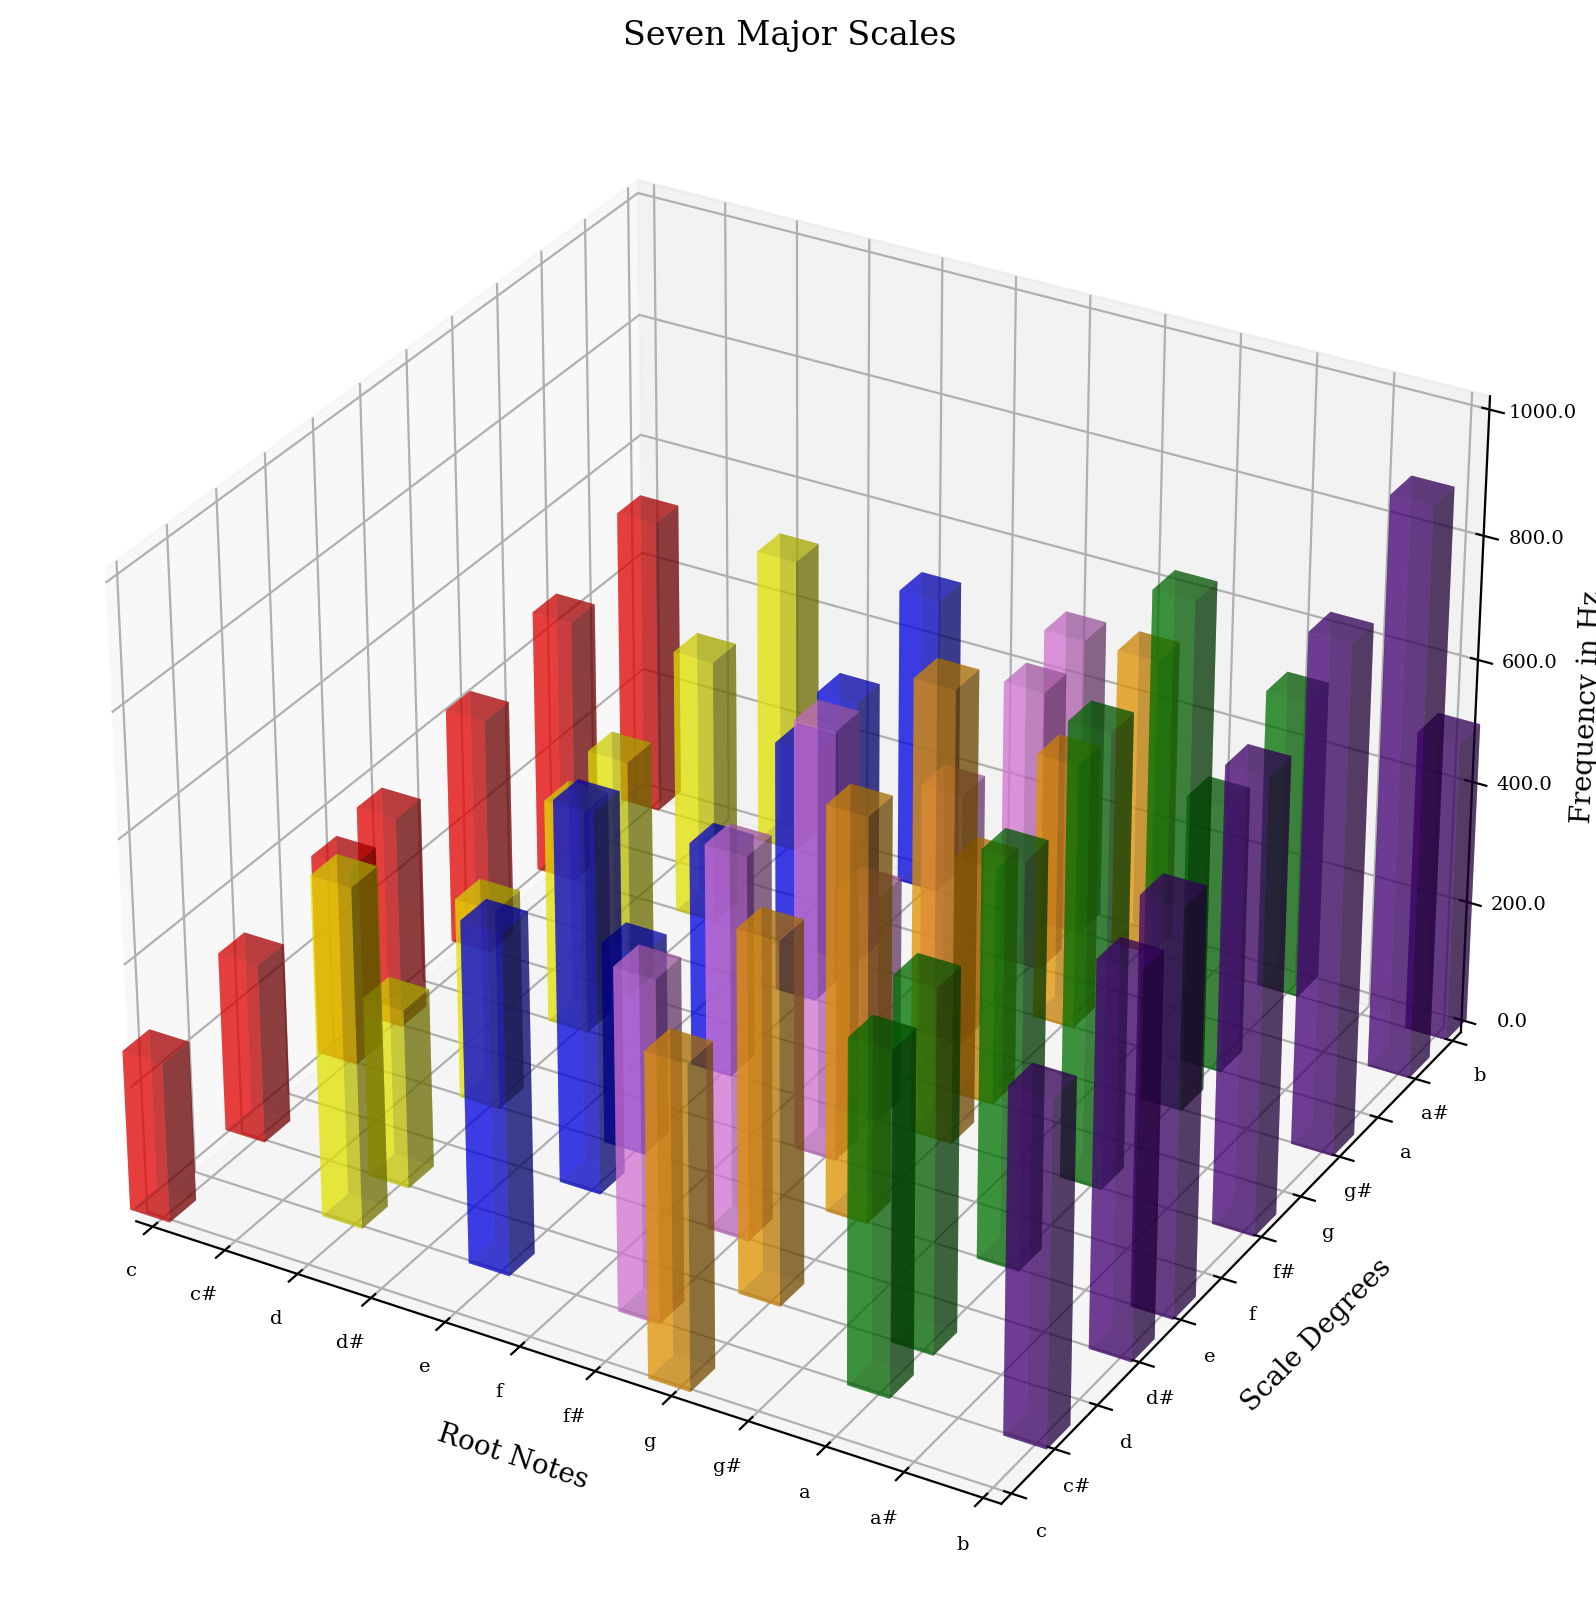

In [53]:
a = graph.primitives.Graph3DBars(title='Seven Major Scales',
                                 alpha=0.5,
                                 barWidth=0.2,
                                 useKeyValues=True,
                                 figureSize=(10, 10, 4),
                                )
a.data = data
a.axis['x']['ticks'] = (range(12), ('c c# d d# e f f# g g# a a# b').split())
a.axis['y']['ticks'] = (range(12), ('c c# d d# e f f# g g# a a# b').split())
a.axis['z']['range'] = (0, 1000)

a.setAxisLabel('x', 'Root Notes')
a.setAxisLabel('y', 'Scale Degrees')
a.setAxisLabel('z', 'Frequency in Hz')
a.process()

But sometimes you need to go all the way back to **Matplotlib** to get the graph that you want.

such as this graph showing the **motion of individual parts** in a Bach Chorale.

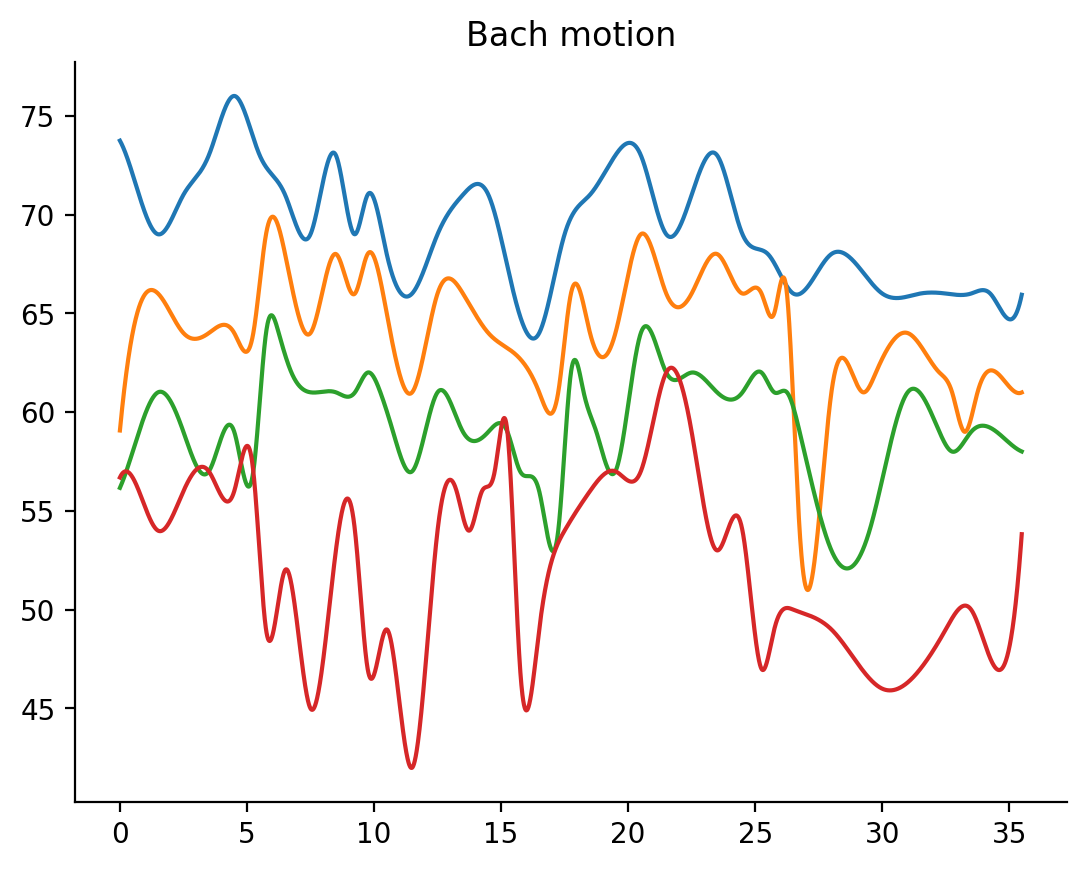

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from music21 import corpus

bach = corpus.parse('bwv66.6')

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

for i in range(len(bach.parts)):
    top = bach.parts[i].flatten().notes
    y = [n.pitch.ps for n in top]
    x = [n.offset + n.quarterLength/2.0 for n in top]

    tick = interpolate.splrep(x, y, s=0)
    xnew = np.arange(0, max(x), 0.01)
    ynew = interpolate.splev(xnew, tick, der=0)

    subplot.plot(xnew, ynew)
    subplot.spines['top'].set_color('none')
    subplot.spines['right'].set_color('none')

plt.title('Bach motion')

plt.show()